# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [ ]:
# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

%matplotlib inline

Прочитаем исходные данные:

In [87]:
data = pd.read_csv('data/unconv.csv')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов. 

Сделайте промежуточные выводы из проведённого разведывательного анализа.

In [88]:
# Ваш код здесь

### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак. 

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты. 

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных? 
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему? 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы. 

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

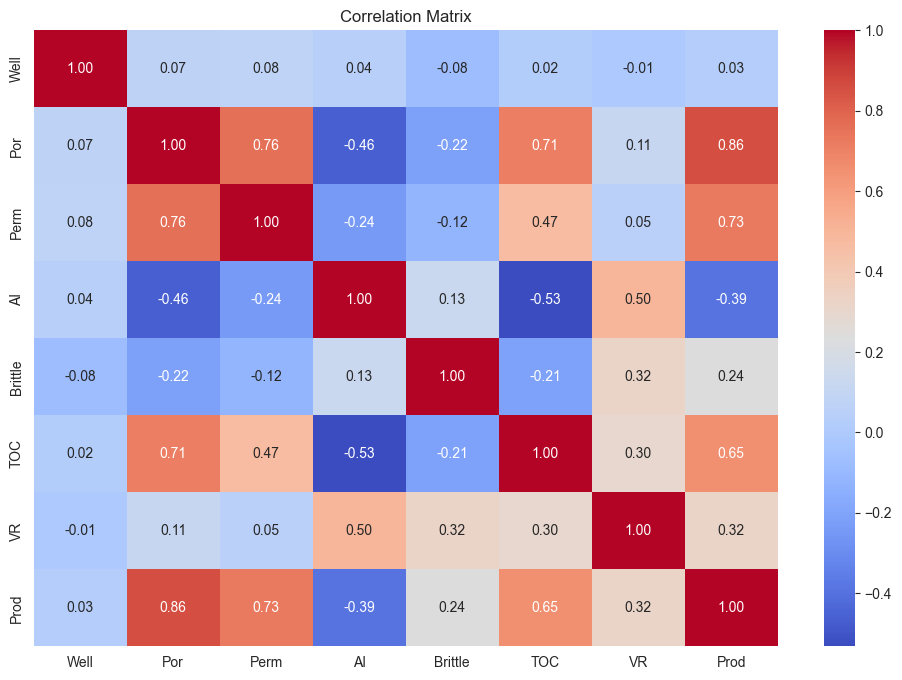

Ранг корреляционной матрицы: 8
Определитель корреляционной матрицы: 0.0007299388072652082


In [89]:
# Вычисление корреляционной матрицы
correlation_matrix = data.corr()

# Построение тепловой карты корреляций
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Преобразование корреляционной матрицы в массив NumPy
correlation_matrix_np = correlation_matrix.to_numpy()

# Ранг корреляционной матрицы
rank = np.linalg.matrix_rank(correlation_matrix_np)
print("Ранг корреляционной матрицы:", rank)

# Определитель корреляционной матрицы
determinant = np.linalg.det(correlation_matrix_np)
print("Определитель корреляционной матрицы:", determinant)


> Какие факторы сильнее всего коррелируют с целевой переменной?
> С целевой переменной (Prod - добыча газа в сутки) сильнее всего коррелируют:
 >  - Por - пористость скважины (%): 0.86
 >  - Perm - проницаемость скважины: 0.73
>
> Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
 >  - Да. Корреляционная матрица является плохо обусловленной, так как ее определитель близок к нулю - 0.0007299388072652082.
>
> Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных? 
 >  - Корреляционная матрица имеет максимальный ранг (8 признаков - ранг 8), но ее определитель практически равен 0 (матрица практически вырожденная). Следовательно, это свидетельствует о наличии мультиколлинеарности в данных. По Тепловой карте видно, что (Perm и Por) и (TOC и Por) имеют сильную связь (выше 0.7)
>
> Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему? 
 >  - Из-за выявленной коллинеарности и плохой обусловленности корреляционной матрицы, применение классической модели линейной регрессии по методу наименьших квадратов может быть проблематичным. Коллинеарность может привести к нестабильности оценок коэффициентов и затруднить интерпретацию результатов. 



### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки. 

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy. 

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [90]:
# Матрица наблюдений
X = data.drop('Prod', axis=1).values

# Вектор правильных ответов
y = data['Prod'].values

# Добавляем столбец с единицами для учета свободного члена в модели
X = np.column_stack((np.ones(X.shape[0]), X))

# Вычислим оценку вектора коэффициентов 
beta = np.linalg.inv(X.T @ X) @ X.T @ y

# Выводим оценки коэффициентов, округленные до целого
print("Полученные оценки коэффициентов модели, округлённые до целого", np.round(beta).astype(int))


Полученные оценки коэффициентов модели, округлённые до целого [-1232     0   230   116  -365    25   -78   785]


> Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
>  - Да, есть. Признак с коэффициентом 0. Этот признак не оказывает влияния на целевую переменную. Таким образом, признак "Well" не оказывает никакого влияния на целевую переменную
> 
> Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.
> - AI с коэффициентом -365: увеличение акустический импеданса приводит к уменьшению добычи газа в сутки (отрицательное влияние на целевую переменную)
> - Por с коэффициентом 230: увеличение коэффициента пористости скважины приводит к увеличению добычи газа в сутки (положительное влияние на целевую переменную)



### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной. 

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день. 

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата. 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

new_data = {
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
Well, Por, Perm, AI, Brittle, TOC, VR = [value for value in new_data.values()]
new = pd.DataFrame([[1, Well, Por, Perm, AI, Brittle, TOC, VR]])


# создаём модель линейной регрессии
model = LinearRegression(fit_intercept=False)

# вычисляем коэффициенты регрессии
model.fit(X, y)

w_hat = model.coef_
print('w_hat:', w_hat)

# Вычисляем прогноз добычи газа
prediction = model.predict(new)
print(f'Прогноз добычи газа для новой скважины (prediction): {prediction[0]} млн. куб. футов в день')

# Вычисление абсолютной ошибки
valid_value = 4748.315024

absolute_error = abs(valid_value - prediction[0])
print(f'Абсолютная ошибка прогноза: {absolute_error} млн. куб. футов в день')

# Прогноз для всех скважин
predictions_all_wells = np.dot(X, w_hat)
# Вычисление RMSE, MSE, R^2 score
mse = mean_squared_error(y, predictions_all_wells)
r2 = r2_score(y, predictions_all_wells)
rmse = np.sqrt(mse)

print("R^2 score:", r2)
print("RMSE:", rmse)


w_hat: [-1.23230803e+03  5.07003631e-02  2.30179140e+02  1.16239006e+02
 -3.65202301e+02  2.49943700e+01 -7.84009294e+01  7.85259815e+02]
Прогноз добычи газа для новой скважины (prediction): 4723.064053707235 млн. куб. футов в день
Абсолютная ошибка прогноза: 25.250970292765487 млн. куб. футов в день
R^2 score: 0.9598506365675629
RMSE: 198.28020612321944


> Исходя из полученных результатов, можно сделать вывод, что модель хорошо справляется с прогнозированием целевой переменной, так как RMSE низкий, а R^2 score близок к 1.

### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**). 

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

In [92]:
# Ваш код здесь

> Посмотрим на коэффициенты модели линейной регрессии и сравним их со значениями выборочных корреляций:
>
> 1. Фактор Well (идентификатор скважины):
>   - Коэффициент в модели: 0
>   - Корреляция: Положительная
>   - Соответствие: Соответствует
>
> 2. Фактор Por (пористость скважины):
>  - Коэффициент в модели: 230
>   - Корреляция: Положительная
>   - Соответствие: Соответствует
>
> 3. Фактор Prem (проницаемость скважины):
>   - Коэффициент в модели: 116
>   - Корреляция: Положительная
>   - Соответствие: Соответствует
>
> 4. Фактор AI (акустический импеданс):
>   - Коэффициент в модели: -365
>   - Корреляция: Отрицательная
>   - Соответствие: Соответствует
>
> 5. Фактор Brittle (коэффициент хрупкости скважины):
>   - Коэффициент в модели: 25
>   - Корреляция: Положительная
>   - Соответствие: Соответствует
>
> 6. Фактор TOC (общий органический углерод):
>   - Коэффициент в модели: -78
>   - Корреляция: Положительная
>   - Соответствие: Не соответствует
>
> 7. Фактор VR (коэффициент отражения витринита):
>   - Коэффициент в модели: 785
>   - Корреляция: Положительная
>   - Соответствие: Соответствует
>   
>Коэффициент в модели линейной регрессии для TOC составляет -78, что говорит о том, что увеличение значения TOC на единицу снижает значение целевой переменной. Однако, корреляция для TOC положительная, что указывает на прямую связь между TOC и целевой переменной.
> Это противоречие результатов может быть обусловлено наличием мультиколлинеарности в данных. По Тепловой карте из задания 5.1 видно, что (Perm и Por) и (TOC и Por) имеют сильную связь (выше 0.7)


### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики). 

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее. 
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

In [93]:
# Матрица наблюдений
X_ = data.drop(columns=["Prod", "Well", "TOC", "Perm"], axis=1).values
# Вектор правильных ответов
y_ = data['Prod'].values

# Добавляем столбец с единицами для учета свободного члена в модели
X_ = np.column_stack((np.ones(X.shape[0]), X_))

# Вычислим оценку вектора коэффициентов 
w_hat_ = np.linalg.inv(X_.T @ X_) @ X_.T @ y_

# Вычислим прогноз
y_pred = X_ @ w_hat_



# Выводим оценки коэффициентов, округленные до целого
print("Полученные оценки коэффициентов модели, округлённые до целого", np.round(w_hat_).astype(int))

# Рассчитываем метрики
r2 = r2_score(y_, y_pred)
rmse = np.sqrt(mean_squared_error(y_, y_pred))

print(f"R^2: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")


Полученные оценки коэффициентов модели, округлённые до целого [-1835   293  -200    28   517]
R^2: 0.9452
RMSE: 231.65


> Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
>
> 1. Фактор Por (пористость скважины):
>  - Коэффициент в модели: 293
>   - Корреляция: Положительная
>   - Соответствие: Соответствует
>
> 2. Фактор AI (акустический импеданс):
>   - Коэффициент в модели: -200
>   - Корреляция: Отрицательная
>   - Соответствие: Соответствует
>
> 3. Фактор Brittle (коэффициент хрупкости скважины):
>   - Коэффициент в модели: 28
>   - Корреляция: Положительная
>   - Соответствие: Соответствует
>
> 4. Фактор VR (коэффициент отражения витринита):
>   - Коэффициент в модели: 517
>   - Корреляция: Положительная
>   - Соответствие: Соответствует
>   
> Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее. 
> 
> R2  score (коэффициент детерминации) показывает долю вариации зависимой переменной (добычи газа), объяснённую моделью. Первоначальное значение было 0.9598, что указывало на очень высокую точность модели. После изменений значение уменьшилось до 0.9452, что все еще является высоким показателем
> RMSE (Root Mean Square Error) или корень из среднеквадратичной ошибки показывает среднее отклонение прогнозов от фактических значений. Изначально было 198.28, а после изменений стало 231.65. Это указывает на то, что точность прогнозов модели снизилась после изменений.
> Исключение из данных сильно коррелированных между собой факторов привело к некоторому снижению точности модели по обеим метрикам (R^2 и RMSE). Тем не менее, полученная модель все еще демонстрирует высокую степень объяснения вариации добычи газа 
> 
> Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?
> Да, удалось

### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную. 

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее. 

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [94]:
# Выводим оценки коэффициентов, округленные до целого
print("Полученные оценки коэффициентов модели, округлённые до целого", np.round(w_hat_).astype(int))

# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_, y_)

# Сделать прогноз для всего обучающего набора данных
y_pred_ = model.predict(X_)

# Рассчитать R2 score
r2 = r2_score(y_, y_pred_)

# Рассчитать RMSE
rmse = np.sqrt(mean_squared_error(y_, y_pred_))

print("R2 score:", r2)
print("RMSE:", rmse)

Полученные оценки коэффициентов модели, округлённые до целого [-1835   293  -200    28   517]
R2 score: 0.9452003827311295
RMSE: 231.64812664736863


> Получили те же результаты, что и ранее в задании 5.5, потому что обучение происходило на одних и тех же данных. Результаты  ручного расчета соответствуют результатам, полученным с использованием библиотеки.

## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию. 

Приступим! Выполните задания 8.1–8.5:


In [95]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`. 

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [96]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# инициализируем стандартизатор StandardScaler
scaler = StandardScaler()
# подгоняем параметры стандартизатора (вычисляем среднее и СКО)
X_st = scaler.fit_transform(X_)

# добавляем полиномиальные признаки
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X_st)

# Выводим количество признаков
print("Количество факторов (признаков) после генерации полиномиальных признаков:", X_poly.shape[1])

# создаём модель линейной регрессии
lr = LinearRegression().fit(X_poly, y_)



# оцениваем качество модели на кросс-валидации, метрика — MSE
cv_results = cross_validate(lr, X_poly, y_, scoring="neg_mean_squared_error", cv=5, return_train_score=True)

# Вывод результатов MSE
print(f"Среднее значение MSE на тренировочных фолдах: {-cv_results['train_score'].mean()}")
print(f"Среднее значение MSE на валидационных фолдах: {-cv_results['test_score'].mean()}")


# оцениваем качество модели на кросс-валидации, метрика — MSE
cv_results = cross_validate(lr, X_poly, y_, scoring="r2", cv=5, return_train_score=True)
print(f"Среднее значение R^2 на тренировочных фолдах: {cv_results['train_score'].mean()}")
print(f"Среднее значение R^2 на валидационных фолдах: {cv_results['test_score'].mean()}")

cv_results = cross_validate(lr, X_poly, y_, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results['train_score'].mean()* 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].mean() * 100))	

Количество факторов (признаков) после генерации полиномиальных признаков: 55
Среднее значение MSE на тренировочных фолдах: 155724.40801238324
Среднее значение MSE на валидационных фолдах: 447339.7883704159
Среднее значение R^2 на тренировочных фолдах: 0.8415913103028702
Среднее значение R^2 на валидационных фолдах: 0.5267076773705088
MAPE на тренировочных фолдах: 6.52 %
MAPE на валидационных фолдах: 7.70 %


> *Ваши выводы здесь*

### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [99]:
from sklearn.linear_model import Lasso

# инициализируем стандартизатор StandardScaler
scaler = StandardScaler()
# подгоняем параметры стандартизатора (вычисляем среднее и СКО)
X_st = scaler.fit_transform(X_)

# добавляем полиномиальные признаки
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X_st)

# создаём модель линейной регрессии c L1-регуляризацией
lasso = Lasso(alpha=0.1, max_iter=10000)

# оцениваем качество модели на кросс-валидации, метрика — MSE
cv_results = cross_validate(lasso, X_poly, y_, scoring="neg_mean_squared_error", cv=5, return_train_score=True)

# Вывод результатов MSE
print(f"Среднее значение MSE на тренировочных фолдах: {-cv_results['train_score'].mean()}")
print(f"Среднее значение MSE на валидационных фолдах: {-cv_results['test_score'].mean()}")


# оцениваем качество модели на кросс-валидации, метрика — MSE
cv_results = cross_validate(lasso, X_poly, y_, scoring="r2", cv=5, return_train_score=True)
print(f"Среднее значение R^2 на тренировочных фолдах: {cv_results['train_score'].mean()}")
print(f"Среднее значение R^2 на валидационных фолдах: {cv_results['test_score'].mean()}")

cv_results = cross_validate(lasso, X_poly, y_, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results['train_score'].mean()* 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].mean() * 100))	


Среднее значение MSE на тренировочных фолдах: 10172.190777889973
Среднее значение MSE на валидационных фолдах: 23662.365731866368
Среднее значение R^2 на тренировочных фолдах: 0.9896080959699536
Среднее значение R^2 на валидационных фолдах: 0.9754106444870336
MAPE на тренировочных фолдах: 1.77 %
MAPE на валидационных фолдах: 2.64 %


> *Ваши выводы здесь*

### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

In [100]:
from sklearn.linear_model import Ridge

scaler = StandardScaler()
# подгоняем параметры стандартизатора (вычисляем среднее и СКО)
X_st = scaler.fit_transform(X_)
# добавляем полиномиальные признаки
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X_st)
# создаём модель линейной регрессии c L2-регуляризацией
ridge = Ridge(alpha=20, solver='svd')

# оцениваем качество модели на кросс-валидации, метрика — MSE
cv_results = cross_validate(ridge, X_poly, y_, scoring="neg_mean_squared_error", cv=5, return_train_score=True)

# Вывод результатов MSE
print(f"Среднее значение MSE на тренировочных фолдах: {-cv_results['train_score'].mean()}")
print(f"Среднее значение MSE на валидационных фолдах: {-cv_results['test_score'].mean()}")


# оцениваем качество модели на кросс-валидации, метрика — MSE
cv_results = cross_validate(ridge, X_poly, y_, scoring="r2", cv=5, return_train_score=True)
print(f"Среднее значение R^2 на тренировочных фолдах: {cv_results['train_score'].mean()}")
print(f"Среднее значение R^2 на валидационных фолдах: {cv_results['test_score'].mean()}")

cv_results = cross_validate(ridge, X_poly, y_, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results['train_score'].mean()* 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].mean() * 100))	



Среднее значение MSE на тренировочных фолдах: 36901.323158117084
Среднее значение MSE на валидационных фолдах: 63866.590151220924
Среднее значение R^2 на тренировочных фолдах: 0.96229524929796
Среднее значение R^2 на валидационных фолдах: 0.9363678929454856
MAPE на тренировочных фолдах: 3.70 %
MAPE на валидационных фолдах: 4.75 %


> *Ваши выводы здесь*

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [101]:
# подгоняем параметры стандартизатора (вычисляем среднее и СКО)
X = scaler.fit_transform(X)
# добавляем полиномиальные признаки
poly = PolynomialFeatures(degree=3, include_bias=False)
X = poly.fit_transform(X)
# создаём модель линейной регрессии c L1- и L2-регуляризациями
lasso = ElasticNet(alpha=2, l1_ratio=0.5, max_iter=10000)

# оцениваем качество модели на кросс-валидации, метрика — MSE
cv_results = cross_validate(lasso, X_poly, y_, scoring="neg_mean_squared_error", cv=5, return_train_score=True)

# Вывод результатов MSE
print(f"Среднее значение MSE на тренировочных фолдах: {-cv_results['train_score'].mean()}")
print(f"Среднее значение MSE на валидационных фолдах: {-cv_results['test_score'].mean()}")


# оцениваем качество модели на кросс-валидации, метрика — MSE
cv_results = cross_validate(lasso, X_poly, y_, scoring="r2", cv=5, return_train_score=True)
print(f"Среднее значение R^2 на тренировочных фолдах: {cv_results['train_score'].mean()}")
print(f"Среднее значение R^2 на валидационных фолдах: {cv_results['test_score'].mean()}")

cv_results = cross_validate(lasso, X_poly, y_, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results['train_score'].mean()* 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].mean() * 100))	

Среднее значение MSE на тренировочных фолдах: 150060.4977709711
Среднее значение MSE на валидационных фолдах: 208180.7798338284
Среднее значение R^2 на тренировочных фолдах: 0.8466467000664732
Среднее значение R^2 на валидационных фолдах: 0.7868502903823732
MAPE на тренировочных фолдах: 7.69 %
MAPE на валидационных фолдах: 8.90 %


> *Ваши выводы здесь*

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [ ]:
# Ваш код здесь

> *Ваши выводы здесь*